In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [2]:
# Load data file
bank=pd.read_csv('data1.csv')
# Make a copy for parsing
question_data = bank.copy()
question_data['C'] = question_data['C'].map( {'Vata':0, 'Kapha':1,'Pitta':2} )
# Convert categorical variables to dummies
question_data_original=question_data
question_data_class=question_data['C']
question_data.drop('C', axis=1, inplace=True)
question_with_dummies = pd.get_dummies(data=question_data)

In [3]:
# standardizing and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
P_scaled=scaler.fit_transform(question_with_dummies)
P_scaled=pd.DataFrame(P_scaled)
pca=PCA(n_components=0.95)
P_pca=pca.fit_transform(P_scaled)
print(P_pca.shape)

(147, 97)


In [4]:
from sklearn.cross_validation import train_test_split
from sklearn import neighbors
from sklearn.metrics import classification_report, confusion_matrix  
X=P_pca
y=question_data_class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[0.9111111111111111, 0.9155555555555555, 0.8911111111111112, 0.9111111111111111, 0.9133333333333333, 0.9355555555555555, 0.888888888888889, 0.906984126984127, 0.9111111111111111, 0.9111111111111111, 0.8225396825396825, 0.888888888888889, 0.8688888888888888, 0.9111111111111111, 0.9269841269841269, 0.8911111111111112, 0.8911111111111112]


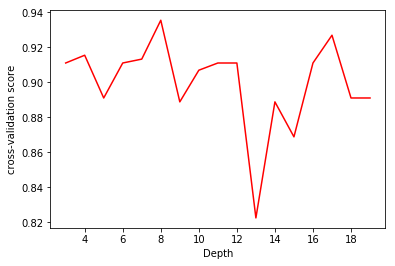

In [5]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

depth = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X_test, y=y_test, cv=5)
    depth.append(scores.mean())
print(depth)
n_range=list(range(3,20))

from matplotlib import pyplot as plt
plt.plot(n_range,depth,color="red")
plt.xlabel('Depth')
plt.ylabel('cross-validation score')
fig1 = plt.gcf()
plt.draw()
plt.show()
fig1.savefig('dt2_d.png',dpi=200)

In [6]:
from sklearn import neighbors
depth=4
clf = clf = tree.DecisionTreeClassifier(max_depth=depth)
clf.fit(X_train, y_train)

#predict
y_pred = clf.predict(X_test)  
## See how the model performs on the test data.
clf.score(X_test, y_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.91      0.95        22
          1       1.00      0.93      0.96        14
          2       0.75      1.00      0.86         9

avg / total       0.95      0.93      0.94        45



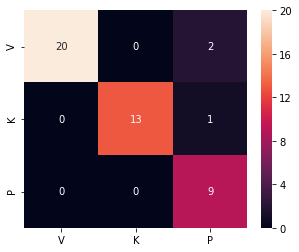

In [7]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(array, index = [i for i in "VKP"],
                  columns = [i for i in "VKP"])
plt.figure(figsize = (5,4))
sn.heatmap(df_cm, annot=True)
fig1 = plt.gcf()
plt.draw()
plt.show()
fig1.savefig('dt3.png',dpi=200)